# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('./data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

* What the dataset looks like?

In [3]:
websites.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


* What are the data types?

In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

* Which columns contain the features of the websites?

In [5]:
websites.URL.value_counts()

URL
M0_109     1
B0_999     1
B0_2292    1
B0_2168    1
B0_2108    1
          ..
B0_104     1
M1_3       1
M0_53      1
M0_50      1
B0_676     1
Name: count, Length: 1781, dtype: int64

In [6]:
websites_features = websites.drop(columns=['URL', 'Type'])
print('This are the features:','\n', websites_features.columns)

This are the features: 
 Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')


* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?


In [7]:
# is maybe 'Type' the feature to predict?
print('This is feature to predict:','\n', websites.Type.value_counts())

This is feature to predict: 
 Type
0    1565
1     216
Name: count, dtype: int64


In [8]:
websites_target = websites.Type
display(websites_target.head(5))

0    1
1    0
2    0
3    0
4    0
Name: Type, dtype: int64

* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

The only one that looks that we could change

In [9]:
websites.CHARSET.value_counts()
# Charset needs to be changed to numerical value

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [10]:
websites.SERVER.value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

In [11]:
websites.WHOIS_COUNTRY.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [12]:
# Your code here
websites.WHOIS_REGDATE.unique()


array(['10/10/2015 18:21', nan, '7/10/1997 4:00', '12/05/1996 0:00',
       '3/08/2016 14:30', '29/07/2002 0:00', '18/03/1997 0:00',
       '8/11/2014 7:41', '14/09/2007 0:00', '22/11/2016 0:00',
       '11/10/2002 0:00', '14/11/2002 0:00', '16/07/2000 0:00',
       '25/05/2013 0:00', '9/08/1999 0:00', '15/09/2013 0:00',
       '3/07/1999 0:00', '2/11/2003 0:00', '12/08/2008 22:10',
       '21/05/2009 0:00', '1/08/2002 0:00', '13/01/2005 0:00',
       '18/05/2005 19:41', '4/01/2001 0:00', '28/02/2008 10:58',
       '8/12/2006 0:00', '16/06/2000 0:00', '13/10/2000 0:00',
       '31/12/1999 0:00', '30/07/1996 0:00', '9/05/2008 0:00',
       '23/04/1999 0:00', '4/02/1997 0:00', '13/02/2003 0:00',
       '17/05/2008 0:00', '30/05/2002 0:00', '20/10/2005 0:00',
       '7/01/2006 0:00', '5/03/1996 5:00', '23/03/1995 0:00',
       '10/01/1998 0:00', '27/04/2016 0:00', '7/04/2011 0:00',
       '26/02/2009 0:00', '3/07/2002 0:00', '21/02/1995 0:00',
       '4/07/2007 0:00', '2/07/1998 0:00', '1

In [13]:
# Your comment here
websites.WHOIS_UPDATED_DATE.unique()
 

array([nan, '12/09/2013 0:45', '11/04/2017 0:00', '3/10/2016 3:45',
       '1/07/2016 0:00', '19/03/2017 0:00', '9/09/2015 0:00',
       '23/11/2016 0:00', '6/10/2016 0:00', '19/04/2015 0:00',
       '4/07/2015 0:00', '23/05/2016 0:00', '10/02/2015 0:00',
       '25/02/2017 0:00', '7/08/2015 0:00', '29/06/2015 0:00',
       '13/07/2016 17:36', '15/05/2016 0:00', '22/03/2016 0:00',
       '2/03/2017 0:00', '19/05/2016 10:14', '3/03/2017 0:00',
       '14/02/2017 20:27', '14/12/2015 0:00', '18/05/2016 0:00',
       '27/04/2017 0:00', '9/04/2017 0:00', '4/07/2016 0:00',
       '27/11/2015 0:00', '25/07/2016 0:00', '8/11/2014 0:00',
       '14/02/2017 0:00', '31/05/2016 0:00', '30/09/2016 0:00',
       '14/12/2016 0:00', '27/05/2016 14:46', '11/11/2012 0:00',
       '29/04/2017 0:00', '8/04/2017 0:00', '6/01/2017 0:00',
       '2/07/2016 0:00', '19/02/2017 0:00', '5/07/2016 0:00',
       '6/02/2017 0:00', '4/01/2017 0:00', '13/11/2016 0:00',
       '26/02/2017 0:00', '15/11/2013 0:00', '9/

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [14]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [15]:
'''
websites_num = websites[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS',
       'CONTENT_LENGTH','TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']]
websites_num.info()'''

"\nwebsites_num = websites[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS',\n       'CONTENT_LENGTH','TCP_CONVERSATION_EXCHANGE',\n       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',\n       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',\n       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']]\nwebsites_num.info()"

In [16]:
websites.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CONTENT_LENGTH             969 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 4   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 5   REMOTE_IPS                 1781 non-null   int64  
 6   APP_BYTES                  1781 non-null   int64  
 7   SOURCE_APP_PACKETS         1781 non-null   int64  
 8   REMOTE_APP_PACKETS         1781 non-null   int64  
 9   SOURCE_APP_BYTES           1781 non-null   int64  
 10  REMOTE_APP_BYTES           1781 non-null   int64  
 11  APP_PACKETS                1781 non-null   int64  
 12  DNS_QUERY_TIMES            1780 non-null   float64
 13  Type                       1781 non-null   int64

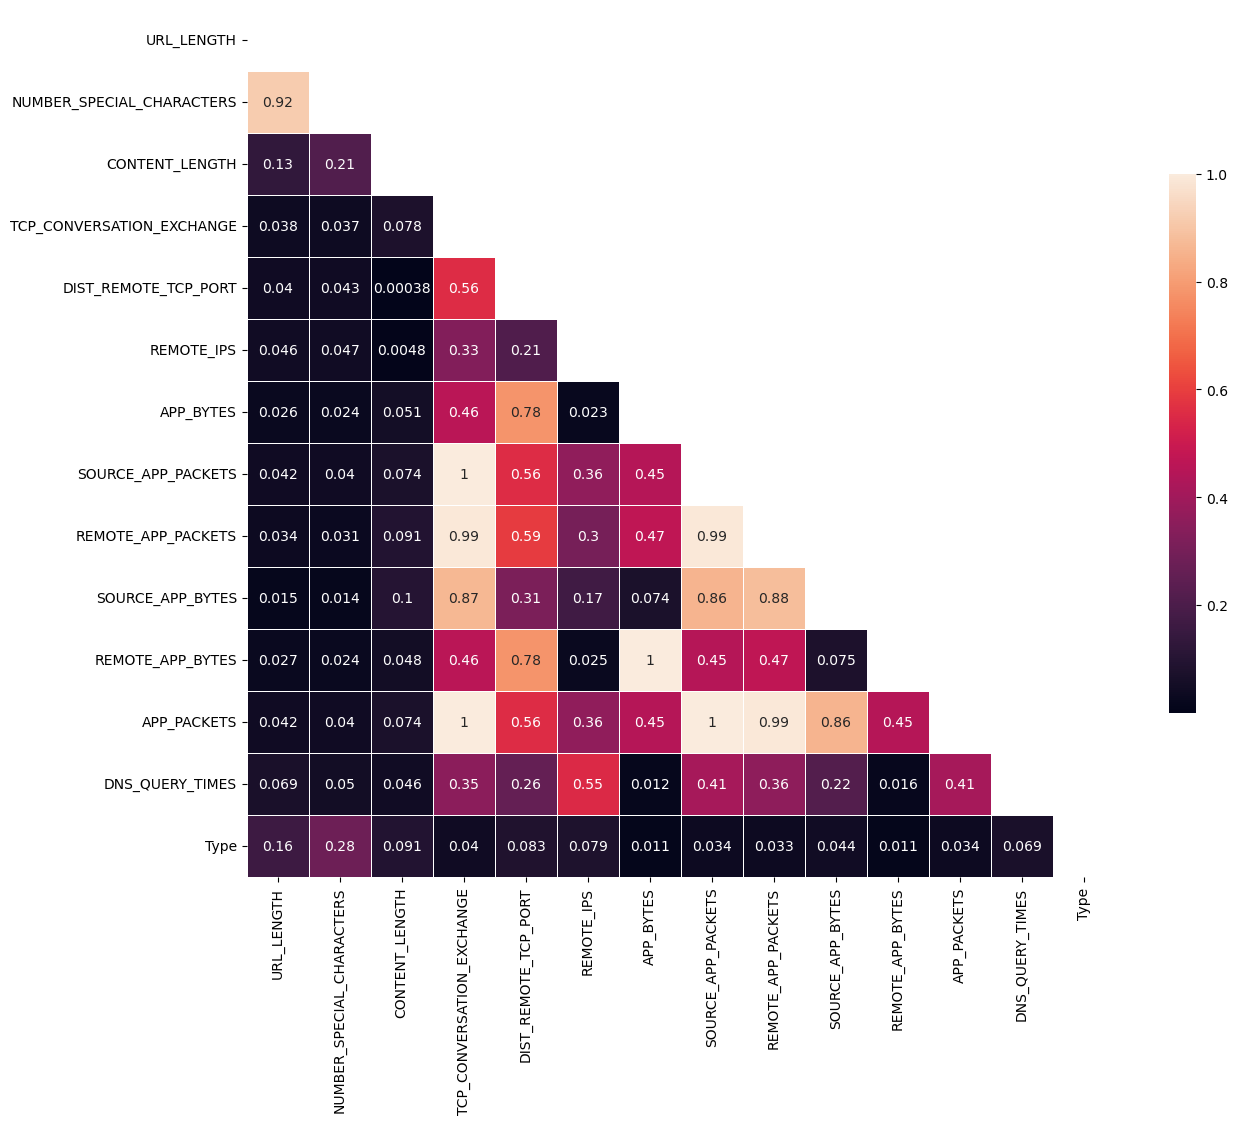

In [17]:
#your code here
import matplotlib.pyplot as plt
import seaborn as sns

corr=np.abs(websites.select_dtypes('number').corr())
# corr=np.abs(websites_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()


In [18]:
# Your comment here
# i will have to remove most of the ones that have high collinearity.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [19]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [20]:
# Your code here

# Remove APP_PACKETS because with TCP_CONVERSATION_EXCHANGE has hight corr. and from bothe the lowest corr to target
websites_reduced = websites.drop(columns=['APP_PACKETS'])

# websites_num_sorted = websites_num.drop(columns=['APP_PACKETS'])

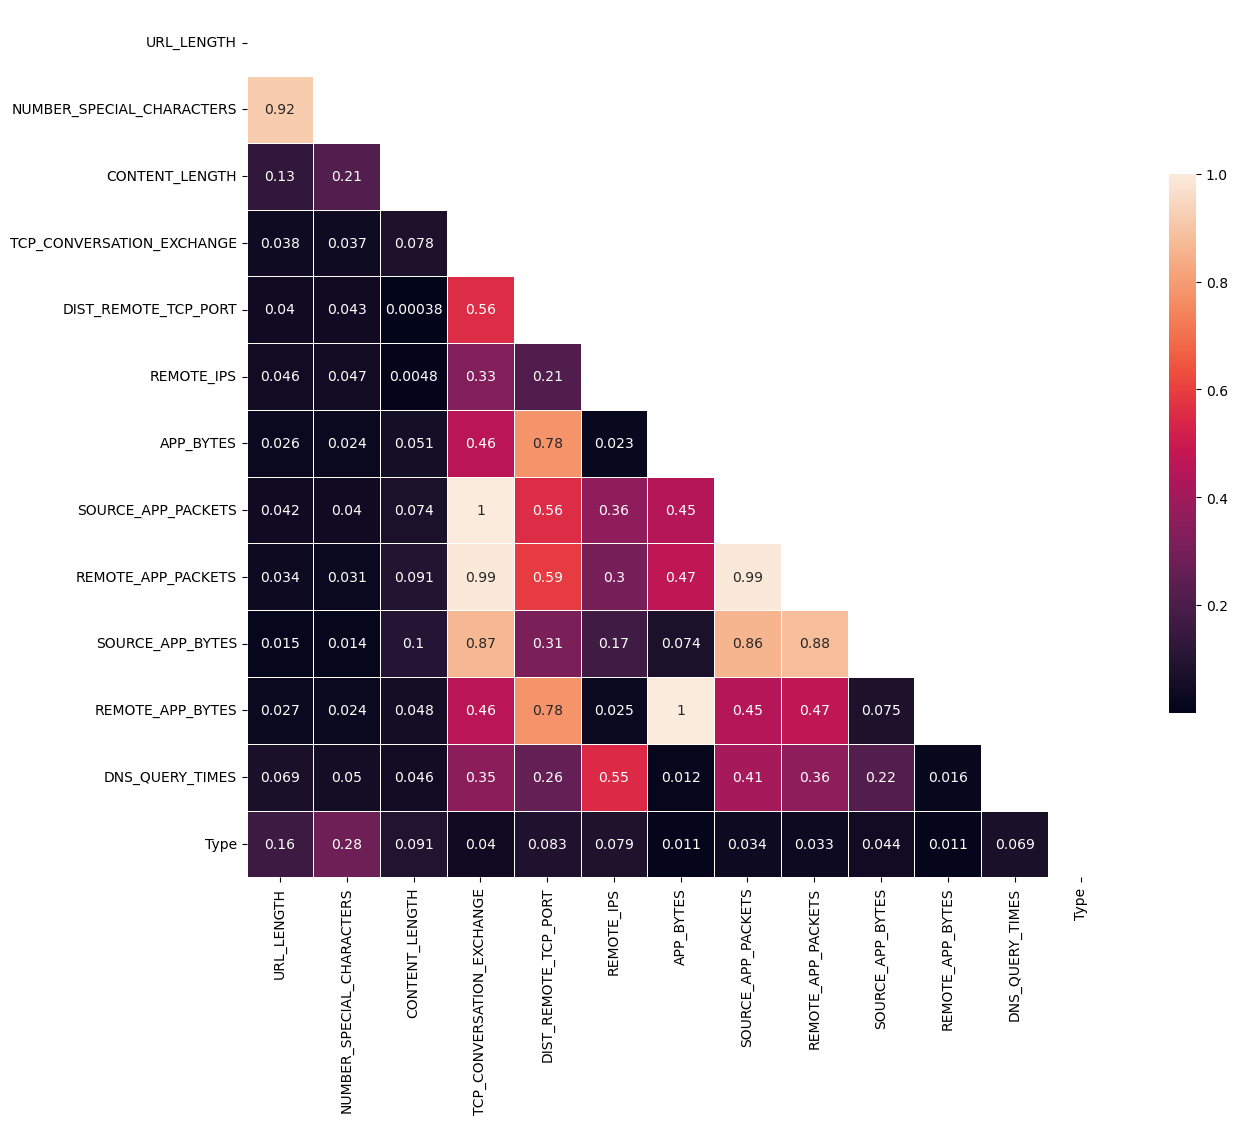

In [21]:
# Your comment here
corr=np.abs(websites_reduced.select_dtypes('number').corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [22]:
# Print heatmap again
# Remove SOURCE_APP_PACKETS because with TCP_CONVERSATION_EXCHANGE has hight corr. and from bothe the lowest corr to target
websites_reduced = websites_reduced.drop(columns=['SOURCE_APP_PACKETS'])


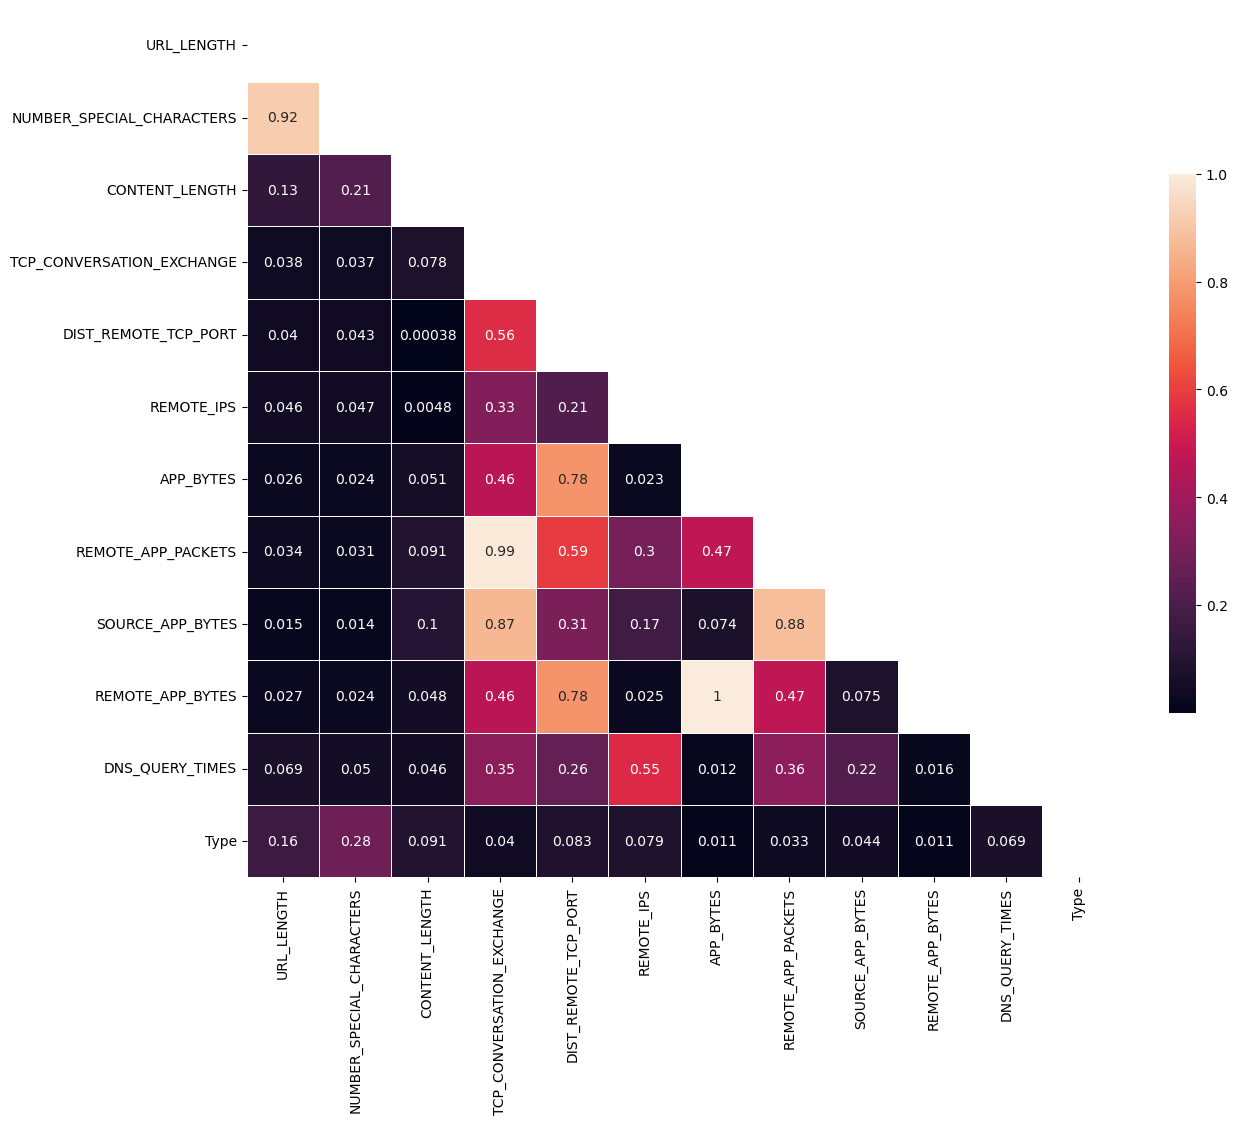

In [23]:
# Your comment here
corr=np.abs(websites_reduced.select_dtypes('number').corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [24]:
# Print heatmap again
# Remove REMOTE_APP_PACKETS because with TCP_CONVERSATION_EXCHANGE has hight corr. and from bothe the lowest corr to target
websites_reduced = websites_reduced.drop(columns=['REMOTE_APP_PACKETS'])

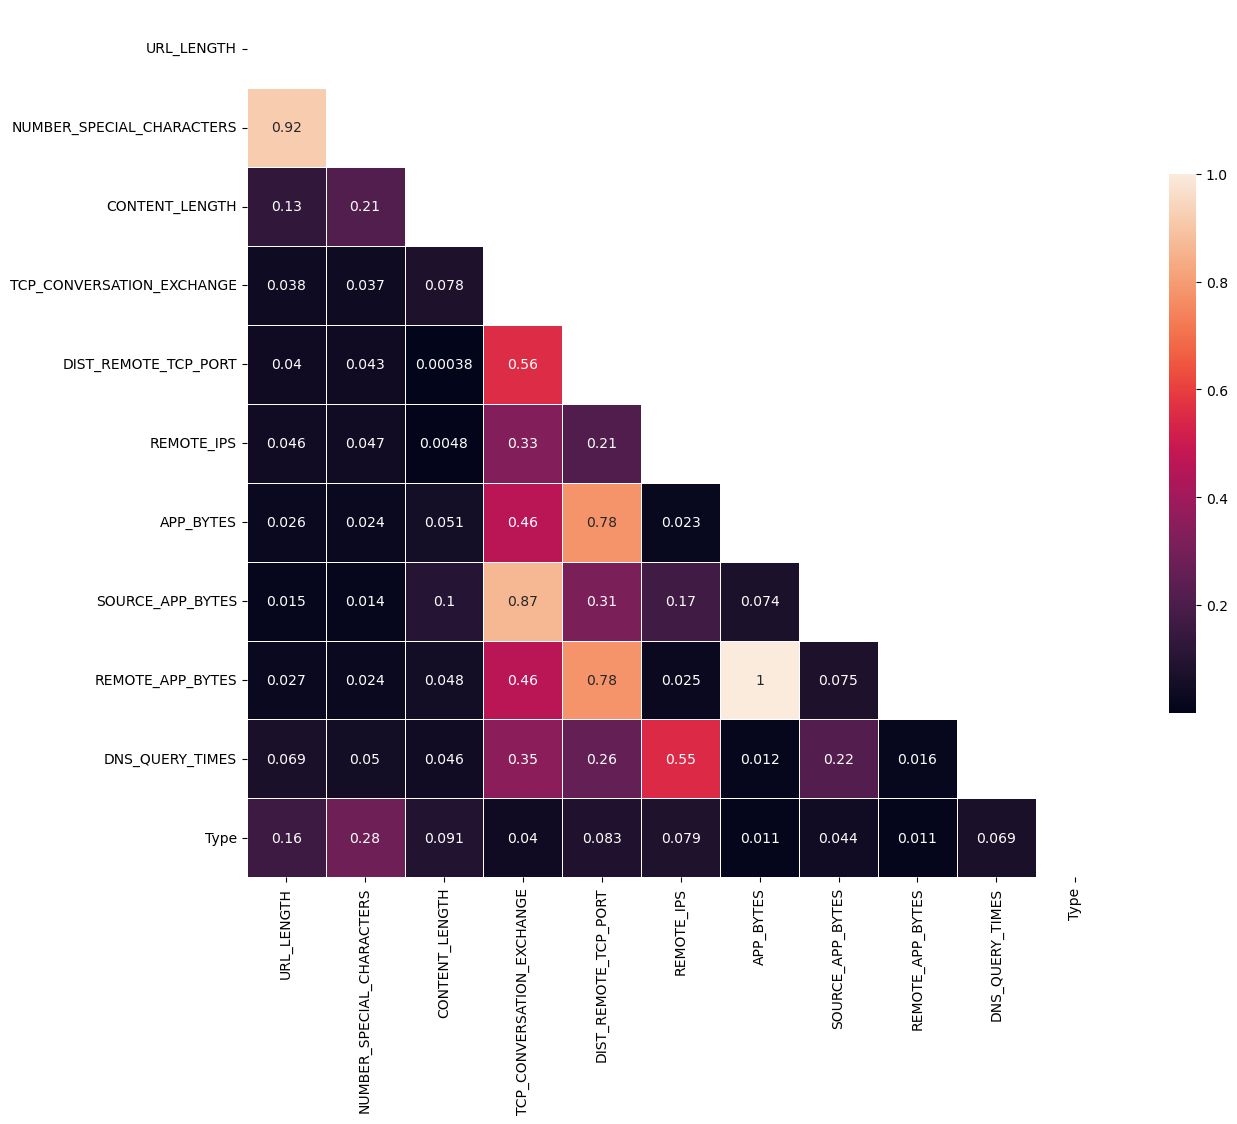

In [25]:
# Your comment here
corr=np.abs(websites_reduced.select_dtypes('number').corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [26]:
# Print heatmap again
# Remove 'TCP_CONVERSATION_EXCHANGE'  because with 'SOURCE_APP_BYTES' has hight corr. and from both is the lowest corr to target
websites_reduced = websites_reduced.drop(columns=['TCP_CONVERSATION_EXCHANGE'])

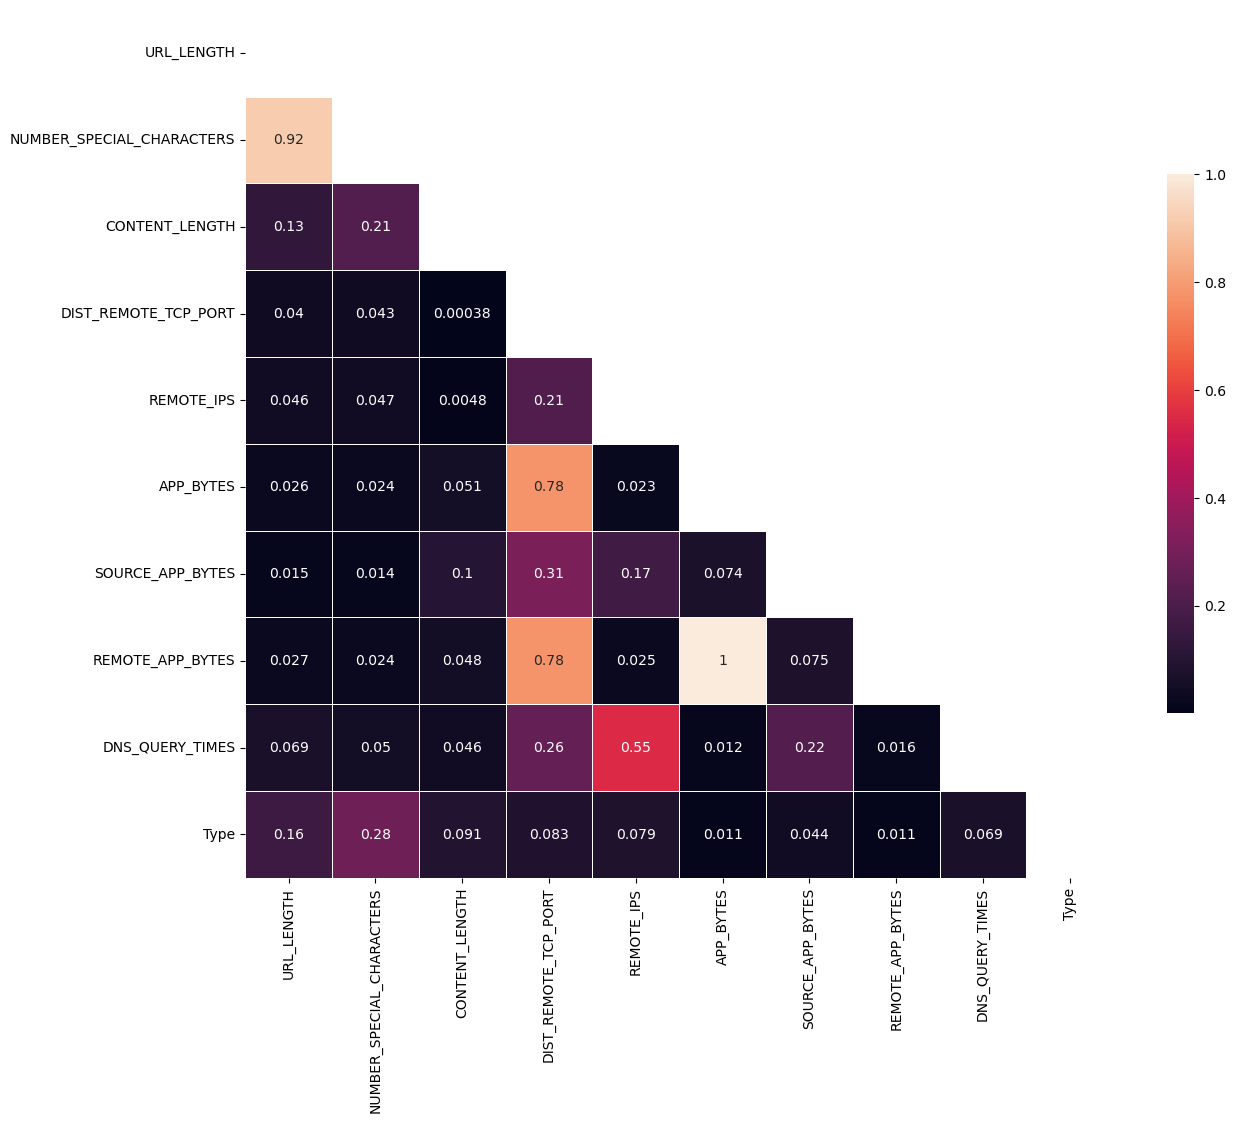

In [27]:
# Your comment here
corr=np.abs(websites_reduced.select_dtypes('number').corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [28]:
# Print heatmap again
# Remove 'URL_LENGTH'  because with 'NUMBER_SPECIAL_CHARACTERS' has hight corr. and from both is the lowest corr to target
# Remove 'APP_BYTES', 'REMOTE_APP_BYTES'  because with ''REMOTE_APP_BYTES'' has hight corr. and from both is the lowest corr to target

websites_reduced = websites_reduced.drop(columns=['URL_LENGTH', 'APP_BYTES'])

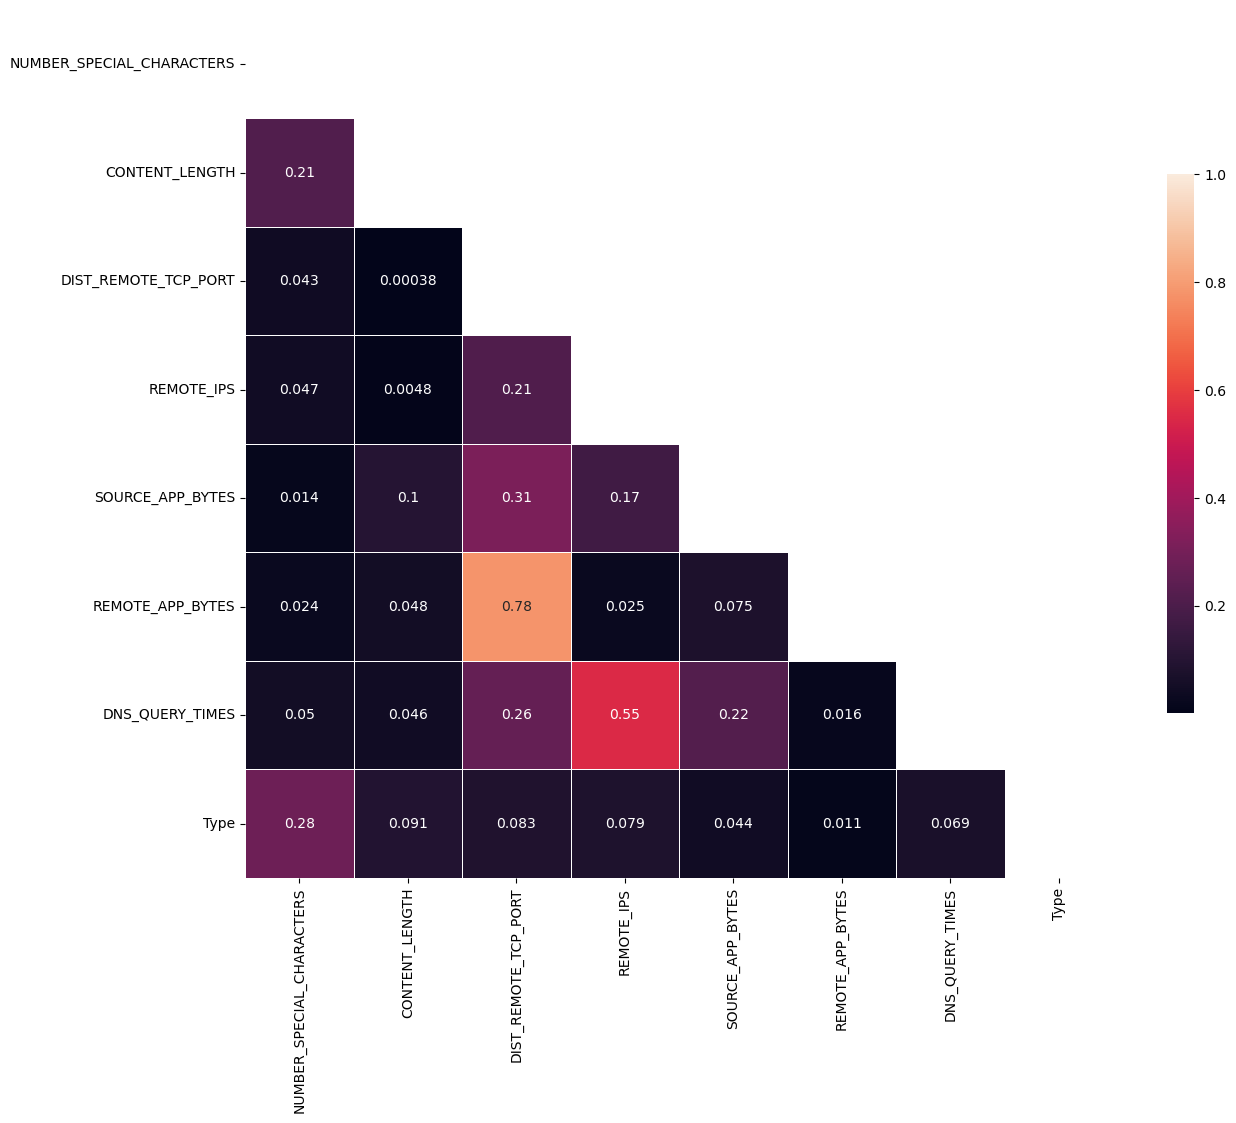

In [29]:
# Your comment here
corr=np.abs(websites_reduced.select_dtypes('number').corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [30]:
websites_reduced.columns

Index(['URL', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [31]:
# Your code here
websites_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1774 non-null   object 
 3   SERVER                     1605 non-null   object 
 4   CONTENT_LENGTH             969 non-null    float64
 5   WHOIS_COUNTRY              1475 non-null   object 
 6   WHOIS_STATEPRO             1419 non-null   object 
 7   WHOIS_REGDATE              1654 non-null   object 
 8   WHOIS_UPDATED_DATE         1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 10  REMOTE_IPS                 1781 non-null   int64  
 11  SOURCE_APP_BYTES           1781 non-null   int64  
 12  REMOTE_APP_BYTES           1781 non-null   int64  
 13  DNS_QUERY_TIMES            1780 non-null   float

In [32]:
websites_reduced.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [33]:
websites_reduced.drop(["CONTENT_LENGTH"], axis=1, inplace=True)

In [34]:
websites_reduced.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [35]:
websites_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1774 non-null   object 
 3   SERVER                     1605 non-null   object 
 4   WHOIS_COUNTRY              1475 non-null   object 
 5   WHOIS_STATEPRO             1419 non-null   object 
 6   WHOIS_REGDATE              1654 non-null   object 
 7   WHOIS_UPDATED_DATE         1642 non-null   object 
 8   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 9   REMOTE_IPS                 1781 non-null   int64  
 10  SOURCE_APP_BYTES           1781 non-null   int64  
 11  REMOTE_APP_BYTES           1781 non-null   int64  
 12  DNS_QUERY_TIMES            1780 non-null   float64
 13  Type                       1781 non-null   int64

In [36]:
# Your comment here
# websites_num_sorted = websites_reduced.dropna(subset='DNS_QUERY_TIMES')

# it is not necesary to only drop from that column, we can do it from all at the same time
websites_reduced = websites_reduced.dropna()


In [37]:
websites_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   CHARSET                    1257 non-null   object 
 3   SERVER                     1257 non-null   object 
 4   WHOIS_COUNTRY              1257 non-null   object 
 5   WHOIS_STATEPRO             1257 non-null   object 
 6   WHOIS_REGDATE              1257 non-null   object 
 7   WHOIS_UPDATED_DATE         1257 non-null   object 
 8   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 9   REMOTE_IPS                 1257 non-null   int64  
 10  SOURCE_APP_BYTES           1257 non-null   int64  
 11  REMOTE_APP_BYTES           1257 non-null   int64  
 12  DNS_QUERY_TIMES            1257 non-null   float64
 13  Type                       1257 non-null   int64  
dt

In [38]:
websites_reduced = websites_reduced.reset_index(drop=True)

In [39]:
websites_reduced.tail(5)

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
1252,M4_48,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,186,0,0.0,1
1253,M4_41,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,124,0,0.0,1
1254,B0_162,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,2,6,132181,6945,4.0,0
1255,B0_1152,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0.0,0
1256,B0_676,40,utf-8,Microsoft-IIS/8.5,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,6,11,3039,2776,6.0,0


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [40]:
# Examine missing values in each column

websites_reduced.isnull().sum()

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [41]:
# Your code here
websites_reduced.WHOIS_COUNTRY.unique()


array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [42]:
websites_reduced_rep = websites_reduced.replace({'ru': 'RU', 'us': 'US', 'GB': 'UK', "[u'GB'; u'UK']" : 'UK' })

In [43]:
websites_reduced_rep.WHOIS_COUNTRY.unique()


array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'UK', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [44]:
# Your code here
websites_reduced_rep.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
UK     22
PA     21
JP     10
IN      8
CZ      8
CN      8
RU      6
NL      5
CH      5
BS      4
AT      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
LV      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
TR      1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [45]:
top10_countries = websites_reduced_rep.WHOIS_COUNTRY.value_counts().head(10)

In [46]:
top10_countries

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
UK     22
PA     21
JP     10
IN      8
CZ      8
CN      8
Name: count, dtype: int64

In [47]:
# Step 2 & 3: Replace non-top-10 with "OTHER"
websites_reduced_rep["WHOIS_COUNTRY"] = [
    country if country in top10_countries else "OTHER"
    for country in websites_reduced_rep["WHOIS_COUNTRY"]
]

In [48]:
websites_reduced_rep.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
UK        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [49]:
# Your code here
websites_reduced_rep = websites_reduced_rep.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

In [50]:
websites_reduced_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   CHARSET                    1257 non-null   object 
 3   SERVER                     1257 non-null   object 
 4   WHOIS_COUNTRY              1257 non-null   object 
 5   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 6   REMOTE_IPS                 1257 non-null   int64  
 7   SOURCE_APP_BYTES           1257 non-null   int64  
 8   REMOTE_APP_BYTES           1257 non-null   int64  
 9   DNS_QUERY_TIMES            1257 non-null   float64
 10  Type                       1257 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 108.2+ KB


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [51]:
# Your code here
websites_reduced_rep.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [52]:
# Your code here
websites_reduced_rep = websites_reduced_rep.drop(columns='URL')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [53]:
# Your code here
websites_reduced_rep.CHARSET.value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [54]:
# Your code here
websites_reduced_rep.SERVER.value_counts()

SERVER
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

In [55]:
websites_reduced_rep.SERVER.nunique()

193

![Think Hard](./images/think-hard.jpg)

In [56]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [57]:
# Your code here

websites_reduced_rep.SERVER

# server_options = ['Microsoft', 'Apache', 'nginx']

cleaned_servers = []


for server in websites_reduced_rep.SERVER:
  if 'Microsoft' in server:
    cleaned_servers.append('Microsoft')
  elif 'Apache' in server:
    cleaned_servers.append('Apache')
  elif 'nginx' in server:
    cleaned_servers.append('nginx')
  else:
    cleaned_servers.append('Other')

websites_reduced_rep.SERVER = cleaned_servers


In [58]:
# Count `SERVER` value counts here
websites_reduced_rep.SERVER.value_counts()

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [59]:
# Your code here
# website_dummy = pd.get_dummies(websites_reduced_rep) # Just like this 
website_dummy = pd.get_dummies(websites_reduced_rep,drop_first=True, dtype=int)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [60]:
# Your code here
display(website_dummy.head(5))

,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,6,22,3,18784,4380,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,6,9,838,894,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6,0,3,8559,1327,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,6,0,0,0,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,6,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
display(website_dummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 1   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 2   REMOTE_IPS                 1257 non-null   int64  
 3   SOURCE_APP_BYTES           1257 non-null   int64  
 4   REMOTE_APP_BYTES           1257 non-null   int64  
 5   DNS_QUERY_TIMES            1257 non-null   float64
 6   Type                       1257 non-null   int64  
 7   CHARSET_UTF-8              1257 non-null   int64  
 8   CHARSET_iso-8859-1         1257 non-null   int64  
 9   CHARSET_us-ascii           1257 non-null   int64  
 10  CHARSET_utf-8              1257 non-null   int64  
 11  CHARSET_windows-1251       1257 non-null   int64  
 12  CHARSET_windows-1252       1257 non-null   int64  
 13  SERVER_Microsoft           1257 non-null   int64

None

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [62]:
from sklearn.model_selection import train_test_split

# Your code here:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(website_dummy.drop("Type", axis=1), website_dummy.Type, test_size=0.2, random_state=42)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [63]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# initialize the model
logistic_r_model = LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [64]:
# Your code here:

# training your model on the training datasets -> where the algorithm will learn
logistic_r_model = logistic_r_model.fit(X_trainset, y_trainset)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [65]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 4. Make predictions on the test set
y_pred = logistic_r_model.predict(X_testset)


In [66]:
# 5. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_testset,y_pred))


Confusion Matrix:
[[223   1]
 [ 17  11]]


In [67]:
acc_log = accuracy_score(y_testset, y_pred)


print("Accuracy before scaling:", acc_log)

Accuracy before scaling: 0.9285714285714286


What are your thoughts on the performance of the model? Write your conclusions below.

In [68]:
# Your conclusions here:

# The model has a very good performance


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [69]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

# Initialize Model
knn_model3 = KNeighborsClassifier(n_neighbors=3)

# fit  model
knn_model3.fit(X_trainset, y_trainset)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [70]:
# Your code here:
# 2. Make predictions
y_pred3 = knn_model3.predict(X_testset)

cm3 = confusion_matrix(y_testset, y_pred3)
acc3 = accuracy_score(y_testset, y_pred3)

In [71]:
# 3. Confusion matrix
print("Confusion Matrix for KNN K=3:\n", cm3)

# 4. Accuracy score
print("Accuracy Score for KNN (K=3):\n", acc3)

Confusion Matrix for KNN K=3:
 [[221   3]
 [  9  19]]
Accuracy Score for KNN (K=3):
 0.9523809523809523


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [72]:
# Your code here:

# Initialize Model
knn_model5 = KNeighborsClassifier(n_neighbors=5)

# fit  model
knn_model5.fit(X_trainset, y_trainset)

# 2. Make predictions
y_pred5 = knn_model5.predict(X_testset)


In [73]:
cm5 = confusion_matrix(y_testset, y_pred5)
acc5 = accuracy_score(y_testset, y_pred5)

In [74]:
# 3. Confusion matrix
print("\nConfusion Matrix for K=5:\n", cm5)

# 4. Accuracy score
print("Accuracy Score for KNN (K=3):\n", acc5)


Confusion Matrix for K=5:
 [[223   1]
 [ 10  18]]
Accuracy Score for KNN (K=3):
 0.9563492063492064


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

The confusion Matrix improved very little because the test data is small. but it improveed.

In [75]:
# Your conclusions here:

# Create a comparison table for accuracy
acc_comparison = pd.DataFrame({
    'k value': [3, 5],
    'Accuracy Score': [acc3, acc5]
})

print("\nAccuracy Comparison:")
print(acc_comparison)


Accuracy Comparison:
   k value  Accuracy Score
0        3        0.952381
1        5        0.956349


That means when you increased k from 3 to 5, your accuracy improved slightly — about 0.4 percentage points.


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [76]:
# Your code here
# Import RobustScaler
from sklearn.preprocessing import RobustScaler


In [77]:
# Create the scaler and fit it on X_train
scaler = RobustScaler()
scaler = scaler.fit(X_trainset)

X_train_scaled = scaler.transform(X_trainset)
X_test_scaled = scaler.transform(X_testset)

logistic_r_model_scaled = LogisticRegression()


In [78]:
logistic_r_model_scaled.fit(X_train_scaled, y_trainset)
y_pred_scaled = logistic_r_model_scaled.predict(X_test_scaled)

In [84]:
from sklearn.metrics import accuracy_score

y_pred_scaled = logistic_r_model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_testset, y_pred_scaled)
print(f"Accuracy after scaling: {acc_scaled:.2f}")

# 5. Compare with before
print(f"Accuracy before scaling: {acc_log:.2f}")

Accuracy after scaling: 0.93
Accuracy before scaling: 0.93


In [80]:
# logistic_r_model_scaled.score(X_test_scaled, y_testset)
logistic_r_model_scaled.score(X_test_scaled, y_testset)

0.9285714285714286